# **The Effect of Psychology on B12**

#### Shuchita Mishra @ Northeastern University

This project aims to detect a person's B12 level by looking him/her psychology and mental health.


## **Table of Content**

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## **Problem** <a class="anchor" id="problem"></a>

Psychology and mental health problems are really common in this century. And the lack of vitamin B12 causes some other big health problems like anemia, forgetfulness, neurologic, gastrointestinal problems, etc. Psychology problems can occur for many reasons such as childhood traumas, private life, family problems, work-life, and so on.<br> B12 of a person can be low, normal, or high. Depending on the medical articles, the lower limit of B12 is 200pg/ml and should not be lower than 300pg/ml. Smaller than 300pg/ml values are really low levels for B12 and this can cause a person to stay at the hospital for days. But doctors suggest using oral supplements if B12 is lower than 500pg/ml.


---


As mentioned above, the result of the B12 level will be either low, medium, or high. And this is a classification problem with three categories.

## **Data Understanding**<a class="anchor" id="data_understanding"></a>

The 'National Health and Nutrition Examination Survey(NHANES)' is online dataset repository at www.cdc.gov. Starting from 1999, there are total of 11 datasets, one for each two years. In this project, selected years are 2013-2014 depending on the large amount of B12 data. There is a total of 14,332 persons who attended the survey. 

The dataset contains 5 parts; demographics, examinations, dietary, laboratory, and questionnaire. Demographics, laboratory, and questionnaire parts will be used in this project. 

The demographics part contains individual, family, and household information about person. Gender and age will be taken.

The laboratory part contains blood values and only value of B12 will be taken. Laboratory part is for people that aged 20 between 80.

And lastly, the questionnaire part contains a mental health screener, relationship, family, and sample person questions. Questions related to psychology, mental health, and related to psychology such as household income, sleep disorders will be used in the model.

### Inspecting the data

In [43]:
# load the pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
demographic = pd.read_csv('/Users/shuchitamishra/Desktop/Jobs/Study /ML-project/notebook/data/demographic.csv', index_col=False)
labs = pd.read_csv('/Users/shuchitamishra/Desktop/Jobs/Study /ML-project/notebook/data/labs.csv', index_col=False)
questionnaire = pd.read_csv('/Users/shuchitamishra/Desktop/Jobs/Study /ML-project/notebook/data/questionnaire.csv', index_col=False)

### Inspect the demographic dataset.

In [4]:
demographic.shape

(10175, 47)

There are 47 features and 10175 records in the demographic dataset. The model will be used gender and age from this dataset.<br>RIAGENDR represents gender and RIDAGEYR represents age.

In [5]:
demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [6]:
# get only gender and age columns
demographic = demographic[['SEQN', 'RIDAGEYR', 'RIAGENDR']]

# change the names of columns
demographic.rename(columns={'SEQN': 'ID', 'RIDAGEYR': 'Age', 'RIAGENDR': 'Gender'}, inplace=True)

demographic.head()

,ID,Age,Gender
0,73557,69,1
1,73558,54,1
2,73559,72,1
3,73560,9,1
4,73561,73,2


In gender column, 1 represents male and 2 represents female.

<br>Visualization of distribution of gender

/Users/shuchitamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


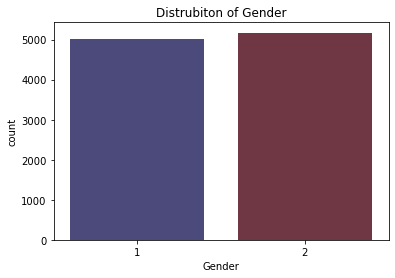

In [7]:
sns.countplot(demographic['Gender'], label='Count', palette='icefire')
plt.title("Distrubiton of Gender")
plt.show()

In [8]:
male = (demographic['Gender'] == 1).sum()
female = (demographic['Gender'] == 2).sum()
print("There are ",male," men and ",female," women in the dataset.")
demographic = demographic[demographic['Age'] > 9]
print("The youngest participant is ",min(demographic['Age'])," years old and the oldest is ",max(demographic['Age'])," years old.")

There are  5003  men and  5172  women in the dataset.
The youngest participant is  10  years old and the oldest is  80  years old.


### Inspect the labs dataset.


In [9]:
labs.shape

(9813, 424)

In [10]:
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


There are 424 features and 9813 records in the dataset. B12 will be used only from this dataset.

<br>LBDB12 represents B12 value.

In [11]:
# Get the columns of id and B12
labs = labs[['SEQN', 'LBDB12']]

# Change the names of columns
labs.rename(columns={'SEQN': 'ID', 'LBDB12': 'B12'}, inplace=True)

labs.head()

,ID,B12
0,73557,524.0
1,73558,507.0
2,73559,732.0
3,73560,NaN
4,73561,225.0


In [12]:
labs['B12'].dtype

dtype('float64')

B12 values are stored as float.



In [13]:
labs['B12'].isnull().sum()

4497

4497 records have missing B12 value.


In [14]:
labs['B12'].describe()

count     5316.000000
mean       640.100263
std        751.967084
min         18.000000
25%        381.000000
50%        514.000000
75%        711.000000
max      26801.000000
Name: B12, dtype: float64

In [15]:
labs['B12'].isna().sum()

4497

Maximum B12 value in the dataset is 26801 and minimum is 18. We can say that people have normal B12 value averagely.

---



### Inspect the questionnaire dataset.

In [16]:
questionnaire.shape

(10175, 953)

This dataset has more features compared to others. Has 953 features. But as mentioned above, only columns that related to mental health and psychology will be selected.

In [17]:
questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In the questionnaire dataset, columns that will be selected are listed below.

*   **DPQ010**: Have little interest in doing things
*   **DPQ020**: Feeling down, depressed or hopeless
*   **DPQ030**: Trouble sleeping or sleeping too much
*   **DPQ040**: Feeling tired or having little energy
*   **DPQ050**: Poor appetite or overeating
*   **DPQ060**: Feeling bad about yourself
*   **DPQ070**: Trouble concentrating on things
*   **DPQ080**: Moving or speaking slowly or too fast
*   **DPQ090**: Thought you would be better off dead
*   **DPQ100**: How difficult have these problems made it for you to do your work, take care of things at home, or get along with people?
<br><br>
*   **SLQ050**: Ever told doctor had trouble sleeping?
*   **SLQ060**: Ever told by doctor have sleep disorder?
<br><br>
*   **IND235**: Monthly family income



In [18]:
# Get the columns
questionnaire = questionnaire[['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'SLQ050', 'SLQ060', 'IND235']]

# Change the name of id column
questionnaire.rename(columns={'SEQN': 'ID'}, inplace=True)

questionnaire.head()

,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,73561,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0


One of the column that will be selected is DPQ020. Asks the people who attends 'Feeling down, depressed or hopeless?' Let's invest this column. All the other columns that related to mental health are same (columns that starts with DPQ).

In [19]:
questionnaire['DPQ020'].unique()

array([ 0., nan,  1.,  3.,  2.,  7.,  9.])


*   0: Not at all
*   1: Several days
*   2: More than half the days
*   3: Nearly every day
*   7: Refused
*   9: Don't know
*   And some missing data



Other column will be selected is related to sleep disorders and has categorical values too.

In [20]:
questionnaire['SLQ050'].unique()

array([ 1.,  2., nan,  9.])



*   1: Yes
*   2: No
*   9: Don't know



## **Data Preparation**<a class="anchor" id="data_preparation"></a>

Age column with non-categorical values will not mean anything to the model. Values need to be categorized and will be as below.<br>

*   1: 20 - 29
*   2: 30 - 39
*   3: 40 - 49
*   4: 50 - 59
*   5: 60 - 69
*   6: 70 - 80



In [21]:
# categorize the data
demographic['Age'] = pd.cut(demographic['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6], include_lowest=True)

demographic.head()

,ID,Age,Gender
0,73557,5,1
1,73558,4,1
2,73559,6,1
4,73561,6,2
5,73562,4,1


The reason that dataset have a nan value on age column is, laboratory dataset only have records that person aged 20 between 80 as mentioned above. Data outside the age of 20 and 80 will have nan value.







/Users/shuchitamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


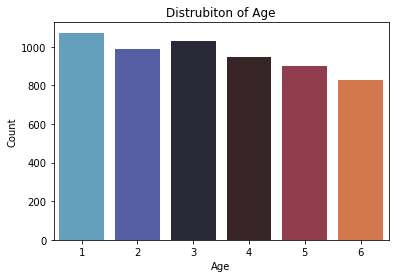

In [22]:
# visualize the distrubiton of age
sns.countplot(demographic['Age'], palette='icefire')
plt.ylabel('Count')
plt.title('Distrubiton of Age')
plt.show()

The distrubiton of ages are nearly close. We can say that most participation is from age between 20 and 29. And worst participation is from age between 70 and 80.

---



Records that has missing values of B12 will be dropped because the model will predict the rank of B12.

In [24]:
# Drop the records with null value in column B12
labs.dropna(axis = 0, inplace = True)
labs.shape

(5316, 2)

There is 5316 records after dropping the null records.

In the labs dataset, there are 424 features. Needed one is the only value of B12. And B12 values will also be categorized as below.<br>

*   Low = 1: 0 - 300
*   Normal = 2: 301 - 950
*   High = 3: 950 - 27000



In [25]:
# Categorize the data
labs['B12'] = pd.cut(labs['B12'], bins=[0, 300, 950, 27000], labels=[1, 2, 3])

labs.head()


,ID,B12
0,73557,2
1,73558,2
2,73559,2
4,73561,1
5,73562,2


/Users/shuchitamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


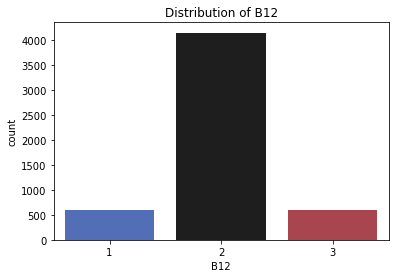

In [26]:
# Visualize the distribution of B12 values
sns.countplot(labs['B12'], label='Count', palette='icefire')
plt.title('Distribution of B12')
plt.show()

As we can see from the graph, people generally have normal B12 value. But this also says that the data is unbalanced. This may make the model to tend to category 2.

In [27]:
labs['B12'].value_counts()

2    4141
3     589
1     586
Name: B12, dtype: int64

Merge the demographics, labs and questionnaire parts.

In [28]:
data = labs.merge(demographic, on="ID").merge(questionnaire, on="ID")

data.head()

,ID,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73561,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,73562,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Id is redundant anymore. Will drop it.

In [29]:
data.drop('ID', axis=1, inplace=True)

data.head()

,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Let's invest the values of columns

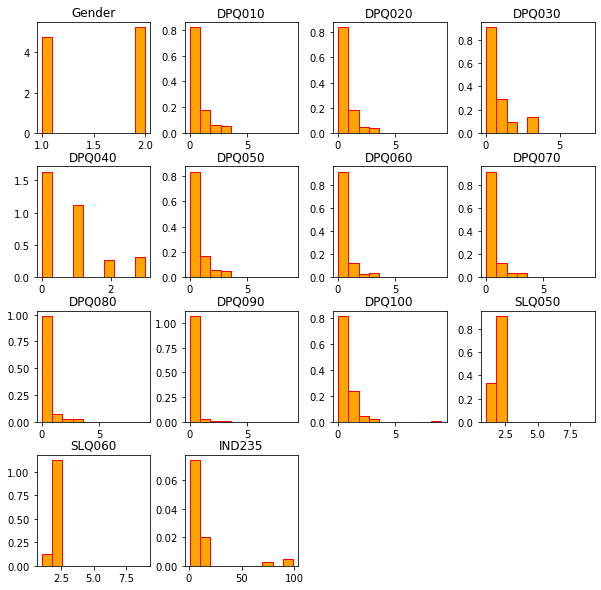

In [30]:
data.hist(figsize = (10,10), grid = False, density = True, color = 'orange', edgecolor = 'red')
plt.show()

We can say that, people generally answers the questions as 'not at all'(0).

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     5316 non-null   category
 1   Age     5316 non-null   category
 2   Gender  5316 non-null   int64   
 3   DPQ010  4875 non-null   float64 
 4   DPQ020  4873 non-null   float64 
 5   DPQ030  4872 non-null   float64 
 6   DPQ040  4872 non-null   float64 
 7   DPQ050  4872 non-null   float64 
 8   DPQ060  4871 non-null   float64 
 9   DPQ070  4871 non-null   float64 
 10  DPQ080  4871 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  DPQ100  3315 non-null   float64 
 13  SLQ050  5316 non-null   float64 
 14  SLQ060  5316 non-null   float64 
 15  IND235  5113 non-null   float64 
dtypes: category(2), float64(13), int64(1)
memory usage: 633.7 KB


There is a total of 5316 records in the dataset. But there are some null values for some features. Especially, the DPQ100 feature has a lot of null records compared to others. Putting average value to these records makes the model work badly, so we will drop this column from the dataset.

In [32]:
data.drop('DPQ100', axis=1, inplace=True)
data.head()

,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,2.0,1.0,10.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     5316 non-null   category
 1   Age     5316 non-null   category
 2   Gender  5316 non-null   int64   
 3   DPQ010  4875 non-null   float64 
 4   DPQ020  4873 non-null   float64 
 5   DPQ030  4872 non-null   float64 
 6   DPQ040  4872 non-null   float64 
 7   DPQ050  4872 non-null   float64 
 8   DPQ060  4871 non-null   float64 
 9   DPQ070  4871 non-null   float64 
 10  DPQ080  4871 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  5316 non-null   float64 
 13  SLQ060  5316 non-null   float64 
 14  IND235  5113 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 592.2 KB


After dropping the column, there is 13 features and still have null records. Features related to mental health (starts with DPQ) are more important compared to others. So, they cannot have a missing value. Records that have a missing value on the mental health features will be dropped from the dataset.

In [34]:
data.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     4870 non-null   category
 1   Age     4870 non-null   category
 2   Gender  4870 non-null   int64   
 3   DPQ010  4870 non-null   float64 
 4   DPQ020  4870 non-null   float64 
 5   DPQ030  4870 non-null   float64 
 6   DPQ040  4870 non-null   float64 
 7   DPQ050  4870 non-null   float64 
 8   DPQ060  4870 non-null   float64 
 9   DPQ070  4870 non-null   float64 
 10  DPQ080  4870 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  4870 non-null   float64 
 13  SLQ060  4870 non-null   float64 
 14  IND235  4702 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Now, we have 4870 records and still have missing values on the IND235 feature. Because the DPQ features are important, will not drop these records from the dataset and will fill the missing values with the average values.

In [35]:
data['IND235'].describe()

count    4702.000000
mean       13.038707
std        22.309702
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        99.000000
Name: IND235, dtype: float64

The average is 6.95 ~ 7. Also in the dataset, 77 represents 'refused' and 99 represents 'don't know'. Will fill these values with 7 also.

In [36]:
data['IND235'].replace({77: 7, 99: 7, None: 7}, inplace=True)


Also the DPQ and SLQ features have refused as 7 and don't know as 9 values. Will replace these values with most occurred value 0 (not at all).

In [37]:
data[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'SLQ050', 'SLQ060']].replace({7: 0, 9: 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     4870 non-null   category
 1   Age     4870 non-null   category
 2   Gender  4870 non-null   int64   
 3   DPQ010  4870 non-null   float64 
 4   DPQ020  4870 non-null   float64 
 5   DPQ030  4870 non-null   float64 
 6   DPQ040  4870 non-null   float64 
 7   DPQ050  4870 non-null   float64 
 8   DPQ060  4870 non-null   float64 
 9   DPQ070  4870 non-null   float64 
 10  DPQ080  4870 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  4870 non-null   float64 
 13  SLQ060  4870 non-null   float64 
 14  IND235  4702 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Convert the age and B12 columns from category to int.

In [38]:
data['B12'] = data['B12'].astype(int)
data['Age'] = data['Age'].astype(int)

In [39]:
data.isna().sum()

B12         0
Age         0
Gender      0
DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
SLQ050      0
SLQ060      0
IND235    168
dtype: int64

In [40]:
data.dropna(subset = ['IND235'], inplace = True)
#data['IND235']

In [41]:
data.isna().sum()

B12       0
Age       0
Gender    0
DPQ010    0
DPQ020    0
DPQ030    0
DPQ040    0
DPQ050    0
DPQ060    0
DPQ070    0
DPQ080    0
DPQ090    0
SLQ050    0
SLQ060    0
IND235    0
dtype: int64

Now our dataset is ready.

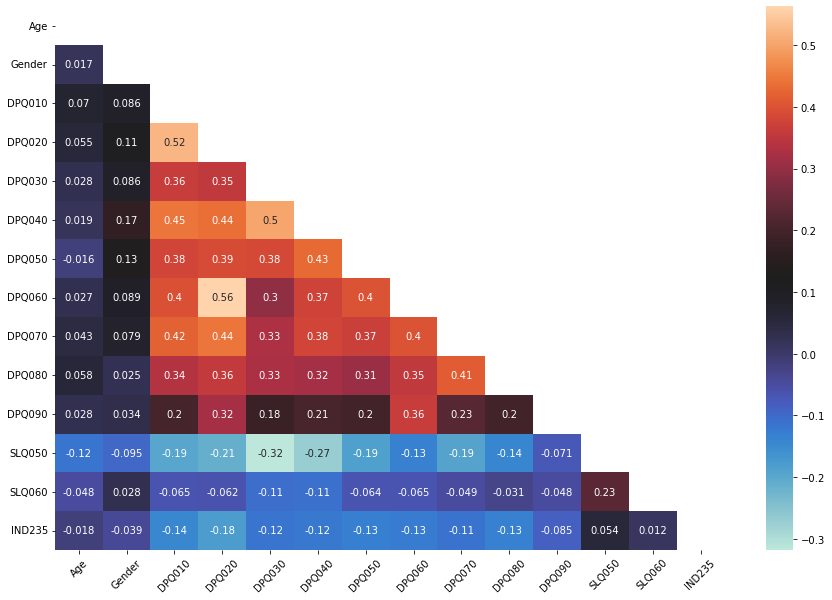

In [44]:

# graph size
plt.figure(figsize=(15, 10))

# to get the lower diagonal of the correlation matrix, using the numpy library
mask = np.triu(data.iloc[:, 1:].corr())

sns.heatmap(data.iloc[:, 1:].corr(), annot=True, mask=mask, cmap = 'icefire')

# change the direction of ticks on y axis
plt.yticks(rotation=0)
plt.xticks(rotation = 45)

plt.show()

Text(69.0, 0.5, 'Features')

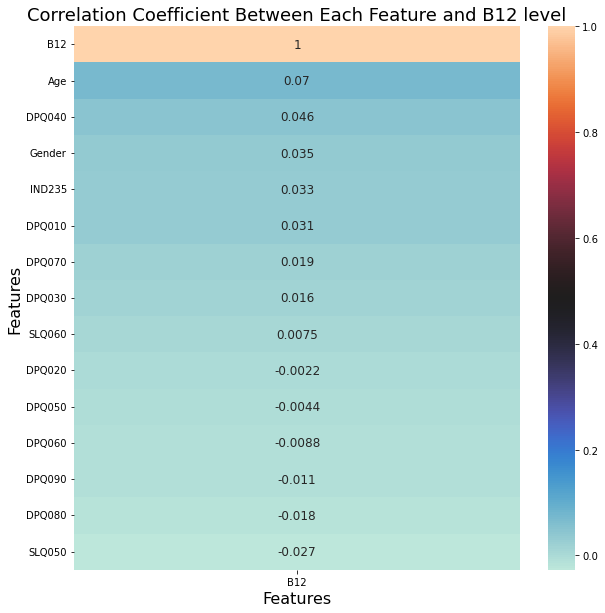

In [45]:
 # Visualizing correlation coefficients between features and target variable:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr()[['B12']].sort_values('B12', ascending=False), annot = True, annot_kws= {"size":12}, cmap='icefire')
ax.set_title('Correlation Coefficient Between Each Feature and B12 level', fontsize=18) 
ax.set_xlabel('Features', fontsize = 16) 
ax.set_ylabel('Features', fontsize = 16) 
#ax.tick_params(axis = "both", labelsize = 12)



*   We can say that columns that starts with DPQ have positive correlation and higher values compared to others.
*   Columns starts with SLQ are not highly correlated and have positive correlation but with all other columns except gender, have negative correlation (SLQ050 column also have negative correlation with gender)
*   We can see that total monthly income is not really correlated with other features.

